In [1]:
import pandas as pd

sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

sentiment.head()
trades.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [2]:
print(sentiment.columns)
print(trades.columns)



Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [3]:
sentiment['date'] = pd.to_datetime(sentiment['date'])
sentiment['date_only'] = sentiment['date'].dt.date


In [6]:
trades['Timestamp IST'].head(10)


,Timestamp IST
0,02-12-2024 22:50
1,02-12-2024 22:50
2,02-12-2024 22:50
3,02-12-2024 22:50
4,02-12-2024 22:50
5,02-12-2024 22:50
6,02-12-2024 22:50
7,02-12-2024 22:50
8,02-12-2024 22:50
9,02-12-2024 22:50


In [7]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], format="%d-%m-%Y %H:%M")
trades['date_only'] = trades['Timestamp IST'].dt.date


In [8]:
trades[['Timestamp IST','date_only']].head()


,Timestamp IST,date_only
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [9]:
sentiment['date'] = pd.to_datetime(sentiment['date'])
sentiment['date_only'] = sentiment['date'].dt.date


In [10]:
sentiment[['date_only','classification']].head()


,date_only,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [11]:
merged = pd.merge(trades, sentiment[['date_only','classification']], on="date_only", how="left")


In [12]:
merged[['date_only','Closed PnL','classification']].head()


,date_only,Closed PnL,classification
0,2024-12-02,0.0,Extreme Greed
1,2024-12-02,0.0,Extreme Greed
2,2024-12-02,0.0,Extreme Greed
3,2024-12-02,0.0,Extreme Greed
4,2024-12-02,0.0,Extreme Greed


In [13]:
merged.groupby("classification")['Closed PnL'].mean().sort_values()


,Closed PnL
classification,
Neutral,34.307718
Extreme Fear,34.537862
Greed,42.743559
Fear,54.290400
Extreme Greed,67.892861


In [14]:
merged['win'] = merged['Closed PnL'] > 0
merged.groupby("classification")['win'].mean()


,win
classification,
Extreme Fear,0.370607
Extreme Greed,0.464943
Fear,0.420768
Greed,0.384828
Neutral,0.396991


In [15]:
merged.groupby("classification")['Size USD'].mean()


,Size USD
classification,
Extreme Fear,5349.731843
Extreme Greed,3112.251565
Fear,7816.109931
Greed,5736.884375
Neutral,4782.732661


In [17]:
print(merged.columns)



Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date_only', 'classification', 'win'],
      dtype='object')


In [18]:
merged.groupby("classification")['Size USD'].mean().sort_values()


,Size USD
classification,
Extreme Greed,3112.251565
Neutral,4782.732661
Extreme Fear,5349.731843
Greed,5736.884375
Fear,7816.109931


In [19]:
merged['classification'].value_counts()


,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


In [20]:
merged.groupby(['classification', 'Direction']).size()


classification  Direction                
Extreme Fear    Buy                            807
                Close Long                    6241
                Close Short                   3117
                Long > Short                     5
                Open Long                     7005
                Open Short                    3174
                Sell                          1042
                Short > Long                     6
                Spot Dust Conversion             3
Extreme Greed   Buy                           5132
                Close Long                    7186
                Close Short                   6497
                Long > Short                     7
                Open Long                     6300
                Open Short                    7663
                Sell                          7164
                Short > Long                    11
                Spot Dust Conversion            32
Fear            Buy                           3207
                Close Long                   17260
                Close Short                   9221
                Long > Short                    14
                Open Long                    17824
                Open Short                   10887
                Sell                          3364
                Short > Long                    18
                Spot Dust Conversion            42
Greed           Auto-Deleveraging                8
                Buy                           4685
                Close Long                    7998
                Close Short                  11322
                Liquidated Isolated Short        1
                Long > Short                    16
                Open Long                     8544
                Open Short                   11664
                Sell                          5986
                Settlement                       1
                Short > Long                    23
                Spot Dust Conversion            55
Neutral         Buy                           2885
                Close Long                    9993
                Close Short                   5850
                Long > Short                    15
                Open Long                    10222
                Open Short                    6353
                Sell                          2346
                Short > Long                    12
                Spot Dust Conversion            10
dtype: int64

In [22]:
import os

os.makedirs("outputs", exist_ok=True)


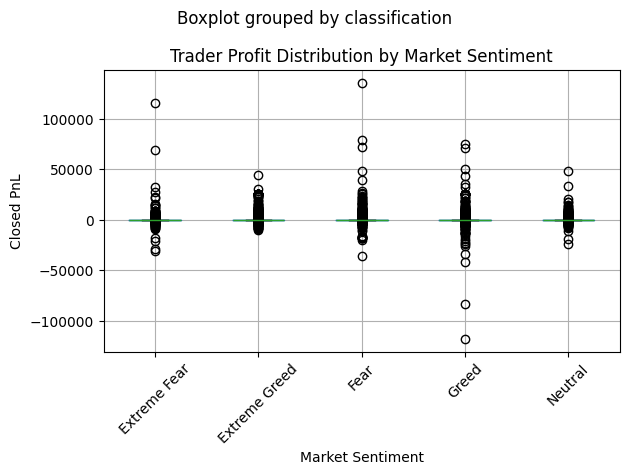

In [23]:
import matplotlib.pyplot as plt

merged.boxplot(column='Closed PnL', by='classification')
plt.title("Trader Profit Distribution by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/pnl_vs_sentiment.png")
plt.show()


Traders show the highest profitability and win rate during Extreme Greed phases, while Fear phases exhibit higher trade volume but lower efficiency. This suggests emotional overtrading during Fear and more favorable conditions during Greed-driven markets.

The provided dataset did not contain leverage information. Trade size (USD) was therefore used as a proxy to analyze risk exposure across market sentiment regimes.